<a href="https://colab.research.google.com/github/NehaGupta-DataScientists/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Import all the required libraies

import pandas as pd
import numpy as np

#---For Visualiztion 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##---Import The Date Class
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#---For Model building----
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#------ for model evaluation -----
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

#---- For handling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the data 
dataset = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

# **Data Inspection**

In [5]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
dataset.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# to get information about data type and columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# To find no. of columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**from above Dataset,it is observed that:**
* There are 14 columns in our dataset.
* All the columns may not be of same importance we're major focused on 'Rented Bike Count' , 'Holiday' , 'Functioning Day' , 'Seasons'.
* There is no null value in dataset.
* Column 'Rented Bike Count'  is dependent variable and other columns are independent variables. 


In [9]:
dataset.shape

(8760, 14)

In [10]:
dataset.size

122640

# **Handling missing values**
A dataset may contain lots of data as null values. These null values may cause error while executing any code or while plotting graphs. So, this null values must be checked before operating on data.

In [11]:
# checking Null values 
dataset.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Observation:** 
* from above dataset, there is no null value, so we don't need to tackle with null value

In [12]:
# To find statistical values from Dataset
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [14]:
dataset.Seasons.describe()

count       8760
unique         4
top       Spring
freq        2208
Name: Seasons, dtype: object

In [15]:
dataset.Date.describe()

count           8760
unique           365
top       01/12/2017
freq              24
Name: Date, dtype: object

In [16]:
dataset.Holiday.describe()

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

In [17]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [18]:
# Rename all the columns 
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [19]:
# Aftr Renaming all the columns 
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [20]:
dataset.Functioning_Day.describe()

count     8760
unique       2
top        Yes
freq      8465
Name: Functioning_Day, dtype: object

In [21]:
dataset.Rented_Bike_Count.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

In [22]:
from datetime import datetime
import datetime as dt

In [24]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date']= dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [25]:
dataset['year']= dataset['Date'].dt.year
dataset['month'] =dataset['Date'].dt.month
dataset['day']=dataset['Date'].dt.day_name()

In [26]:
dataset['Rented_Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

# **Explodatory Data Analysis**

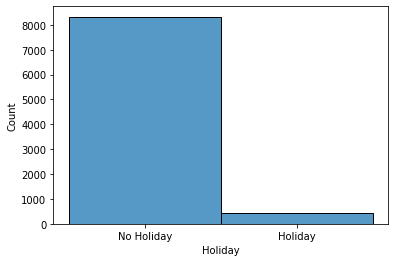

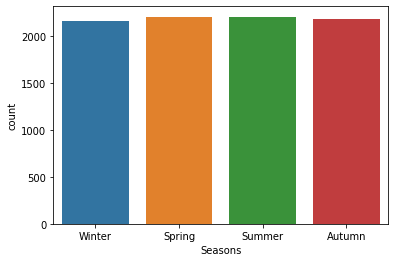

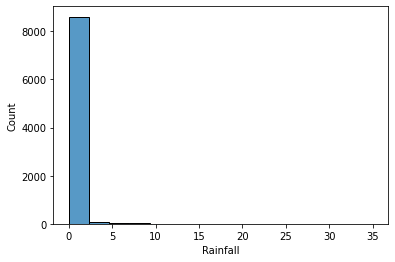

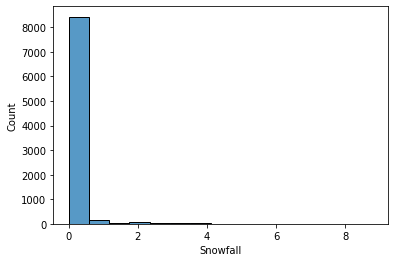

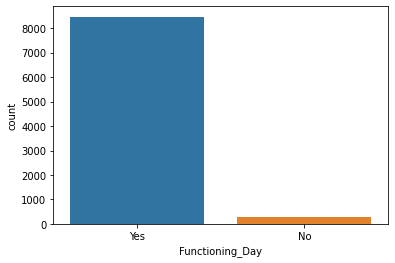

In [27]:
sns.histplot(x= dataset['Holiday'])
plt.show()

sns.countplot(x= dataset['Seasons']) 
plt.show()


sns.histplot(x=dataset['Rainfall']) 
plt.show()

sns.histplot(x=dataset['Snowfall']) 
plt.show()

sns.countplot(x=dataset['Functioning_Day']) 
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

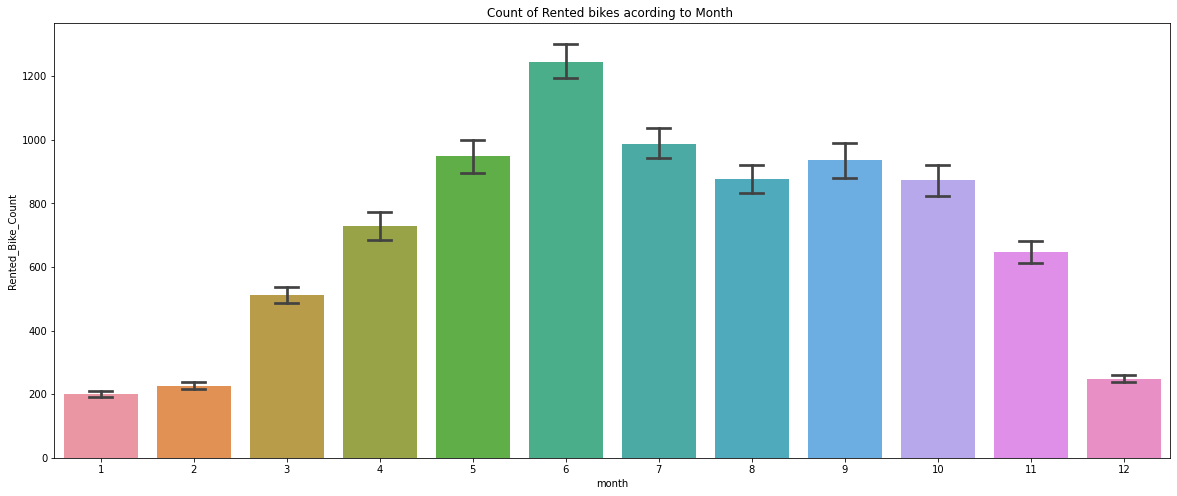

In [28]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

**Observation**
*  Rented bike demand is higher in the month of May, June, July

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

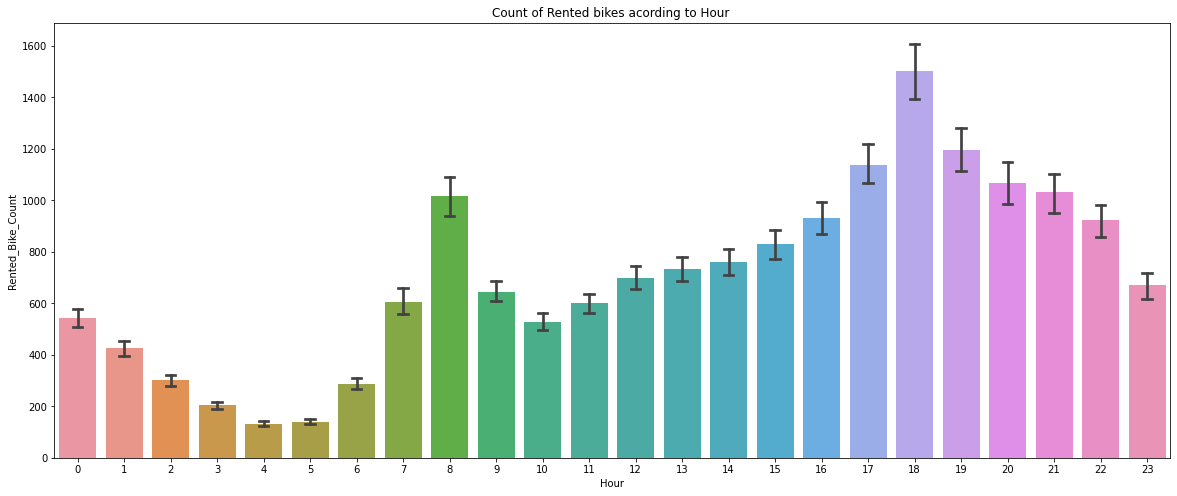

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observation**
bike rented demand is high at 8 A.M. and 6 P.M.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

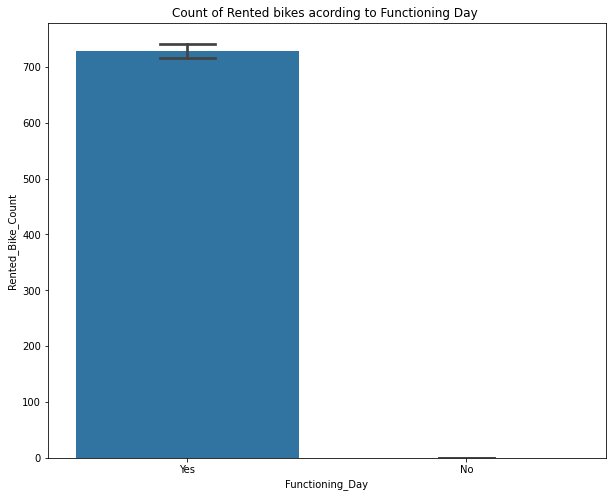

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,y='Rented_Bike_Count',x='Functioning_Day',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

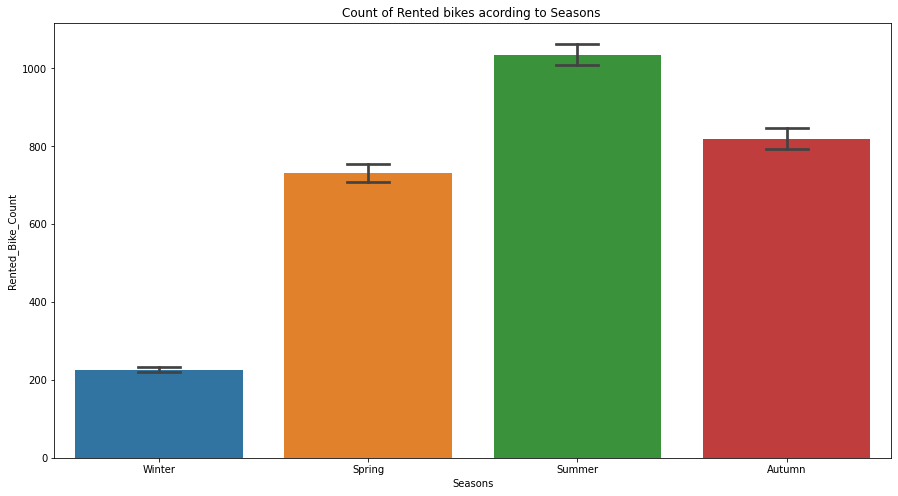

In [31]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,y='Rented_Bike_Count',x='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

**Observation**

in summer season ,bike rented count is high

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

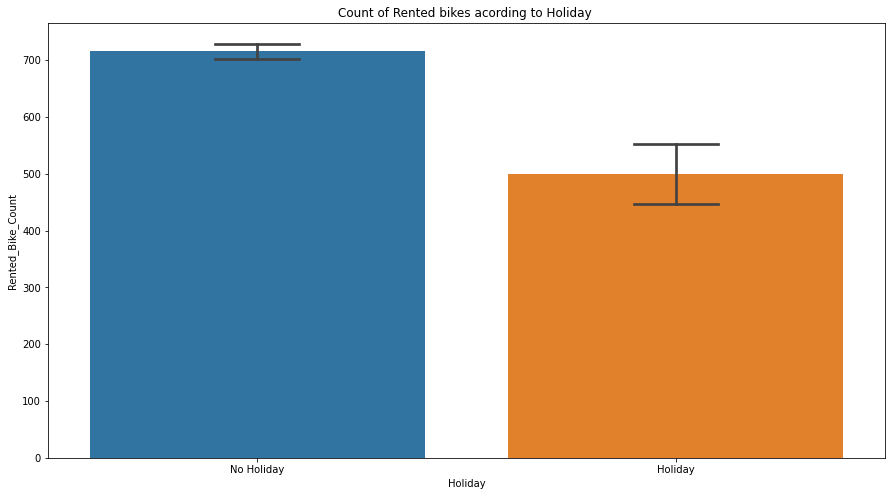

In [32]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

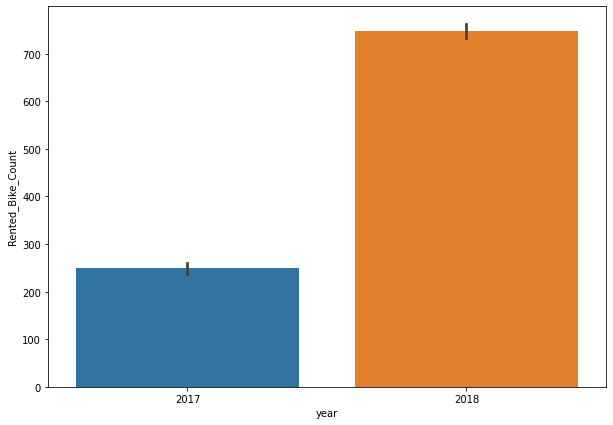

In [33]:
# Rented Bike count Year wise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.year,y=dataset['Rented_Bike_Count'])

In [34]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

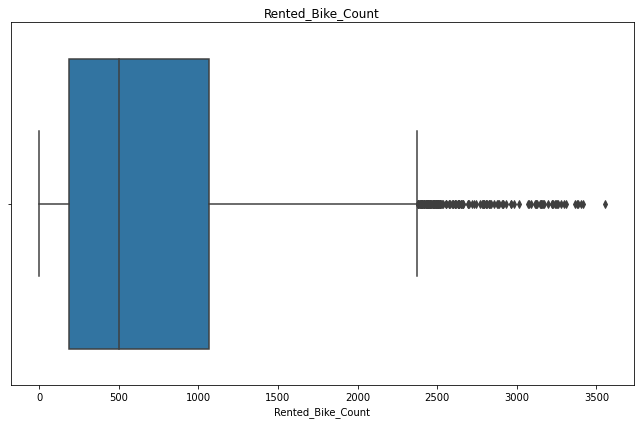

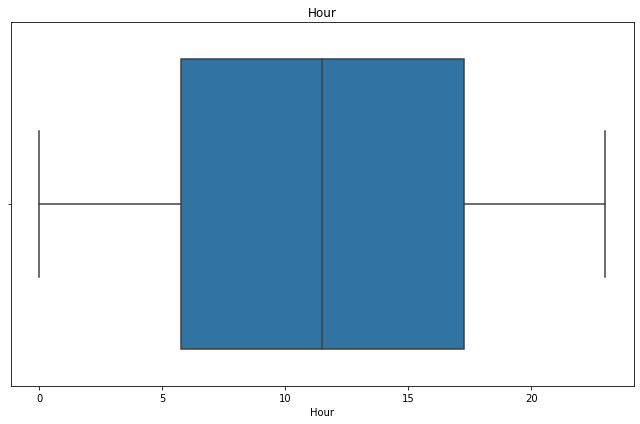

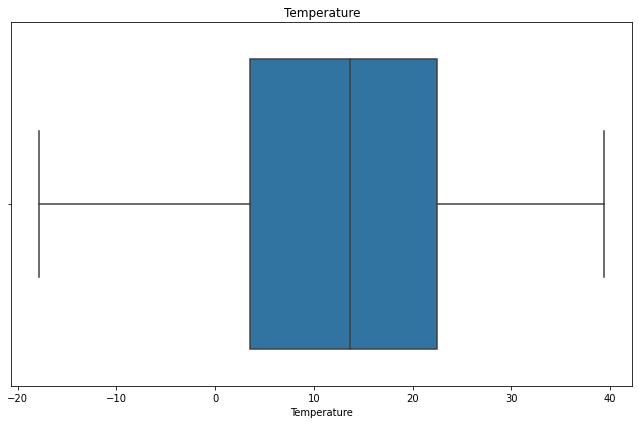

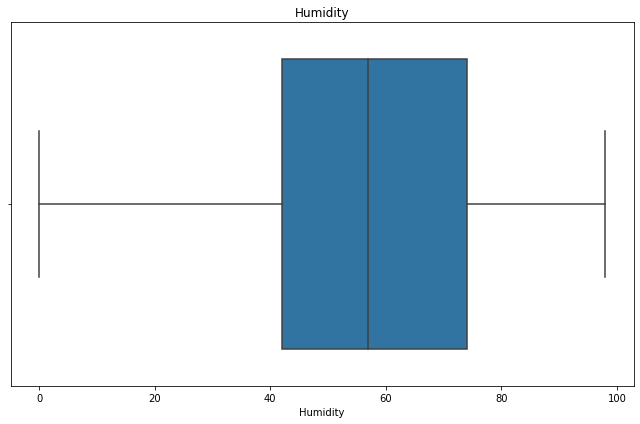

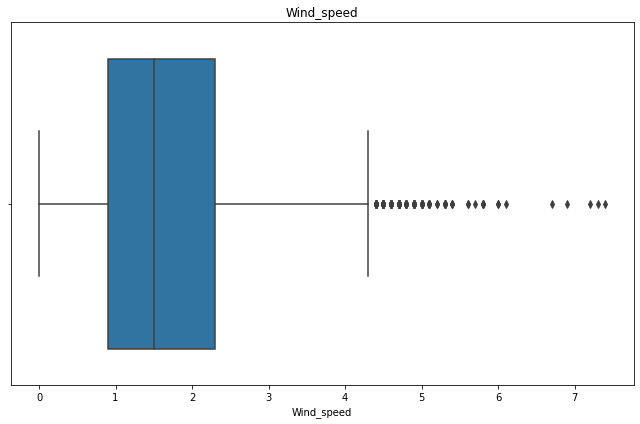

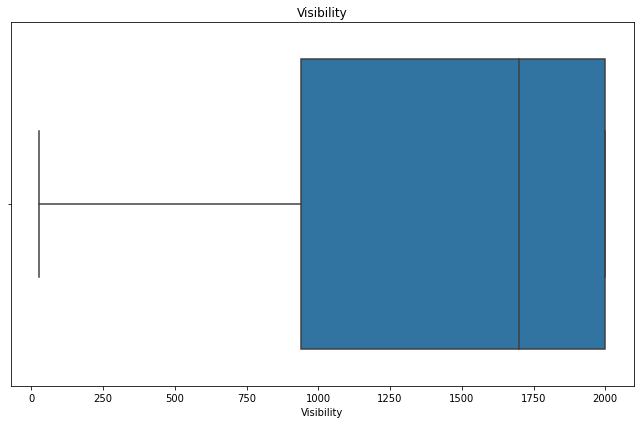

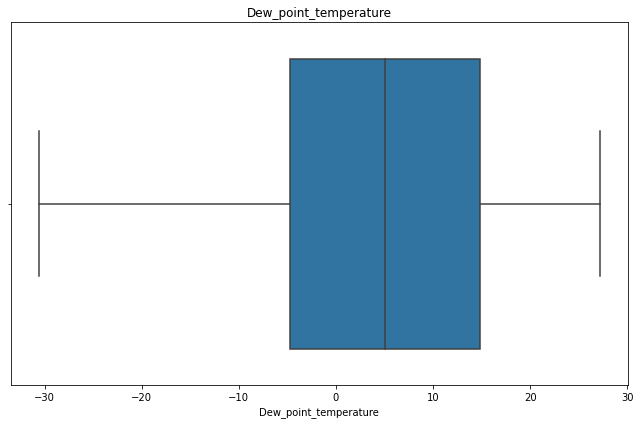

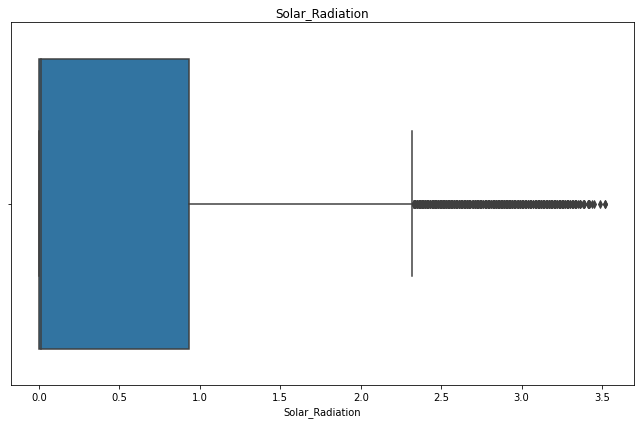

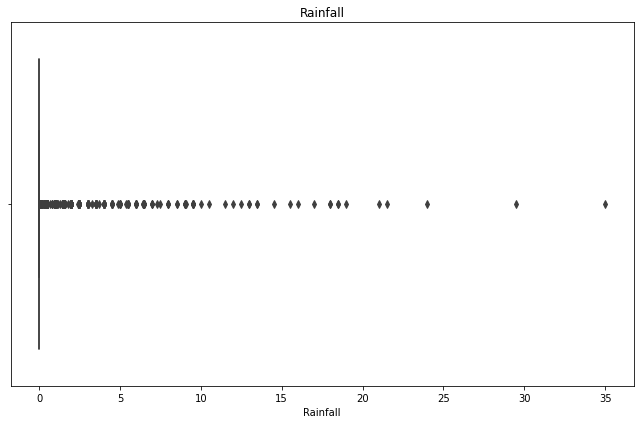

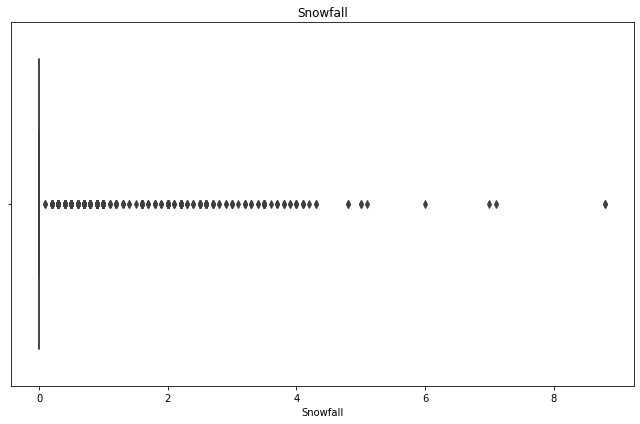

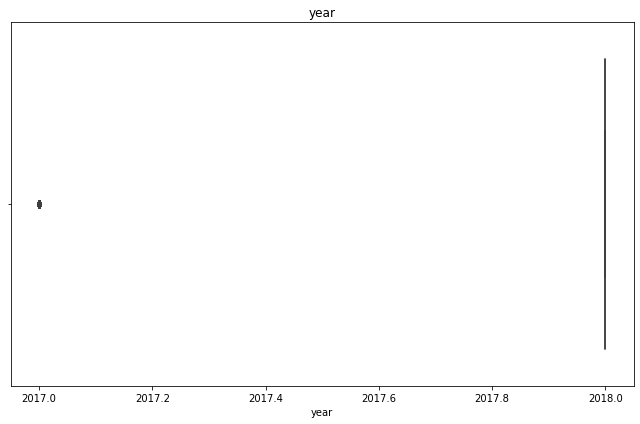

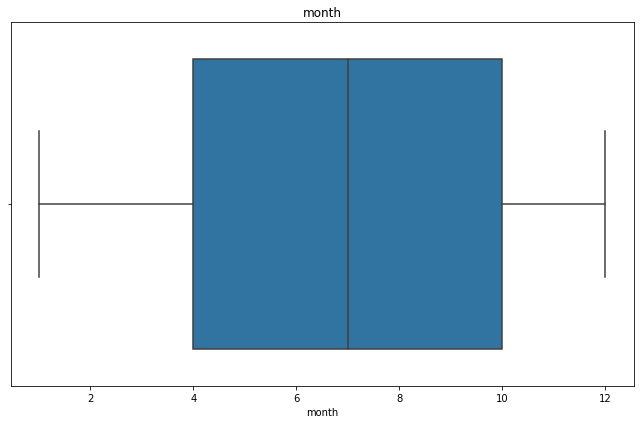

In [37]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

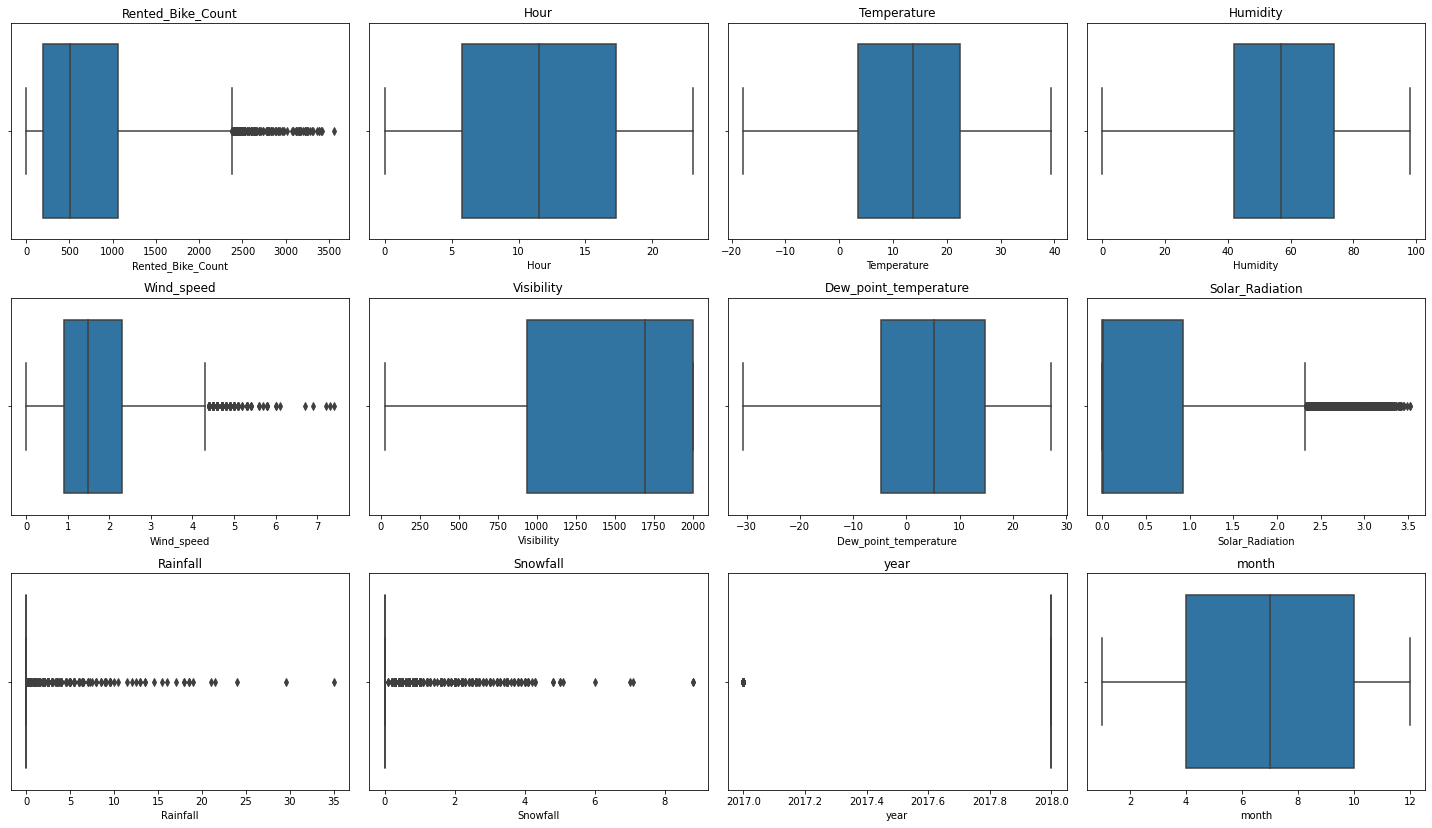

In [39]:
n = 1
plt.figure(figsize=(20,15))

for col in numerical_features:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(x=dataset[col])
  plt.title(col)
  plt.tight_layout()

In [40]:
dataset.loc[dataset['Rainfall']>=2,'Rainfall']= 2
dataset.loc[dataset['Solar_Radiation']>=2,'Solar_Radiation']= 2
dataset.loc[dataset['Snowfall']>=1.5,'Snowfall']= 1.5
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

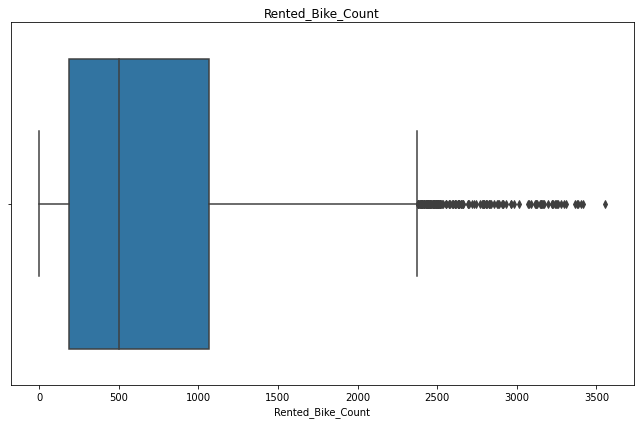

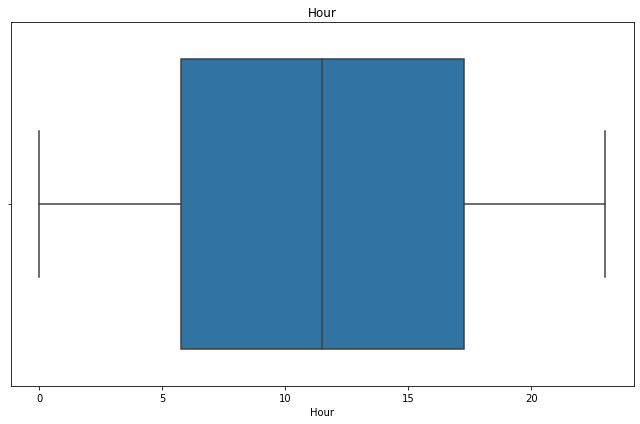

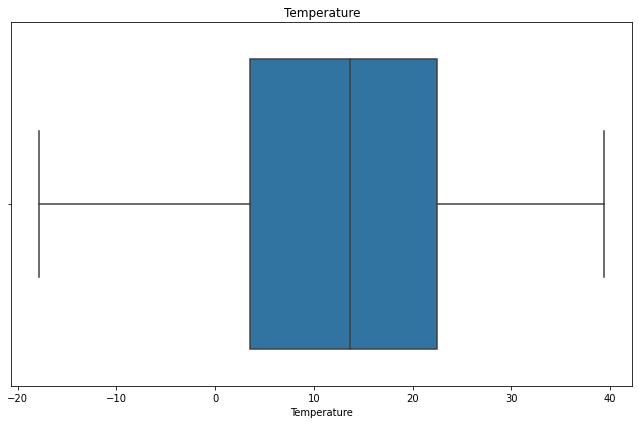

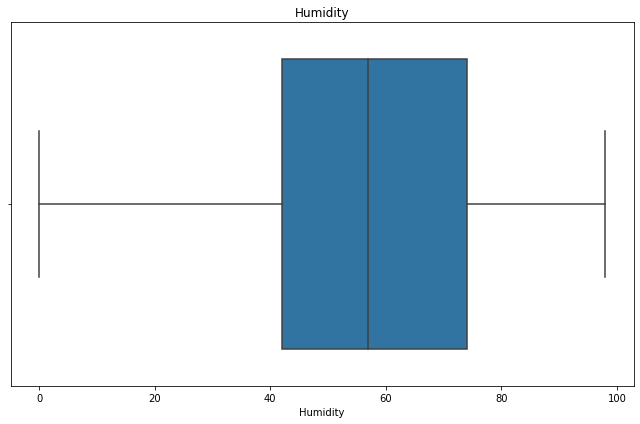

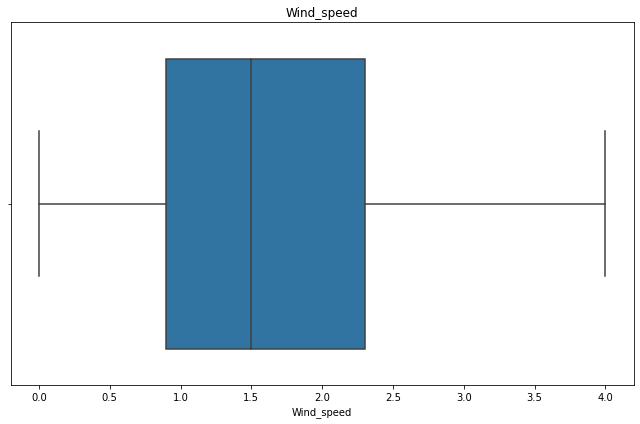

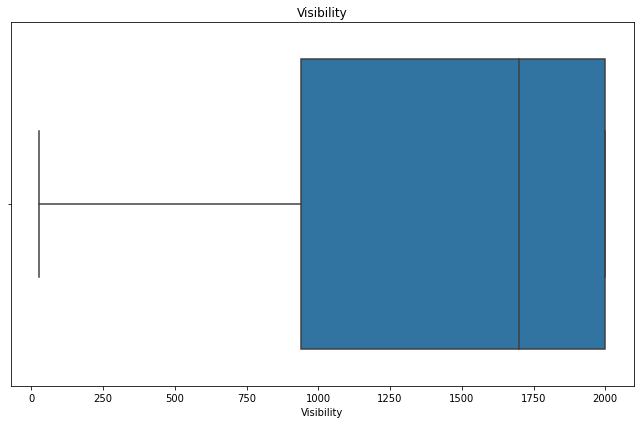

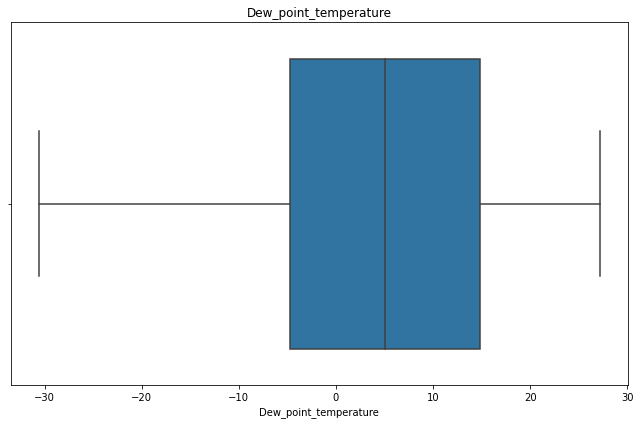

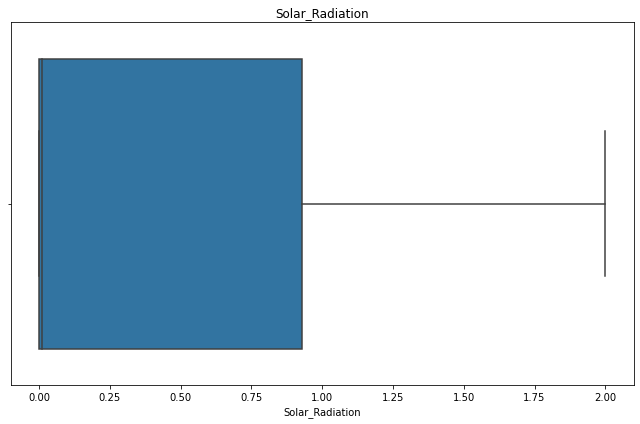

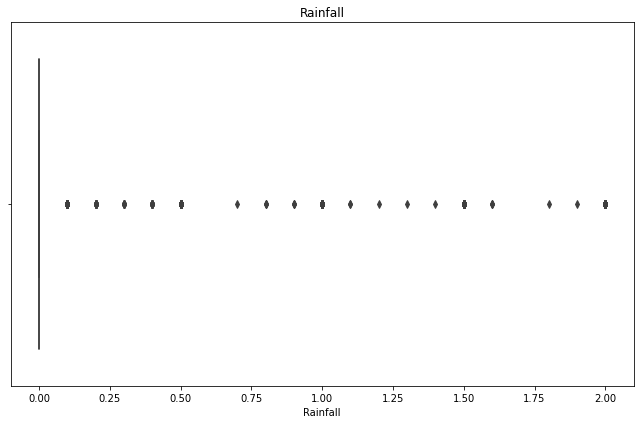

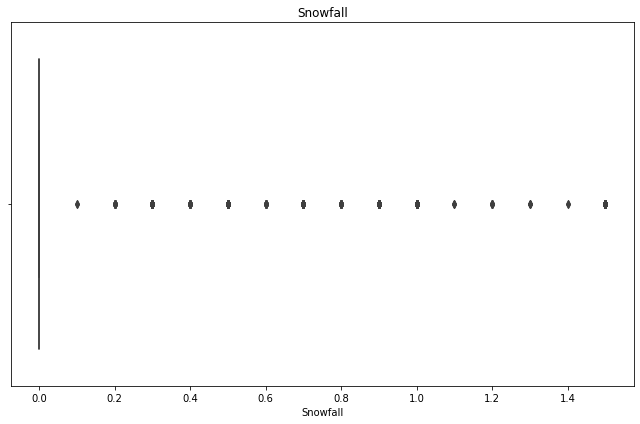

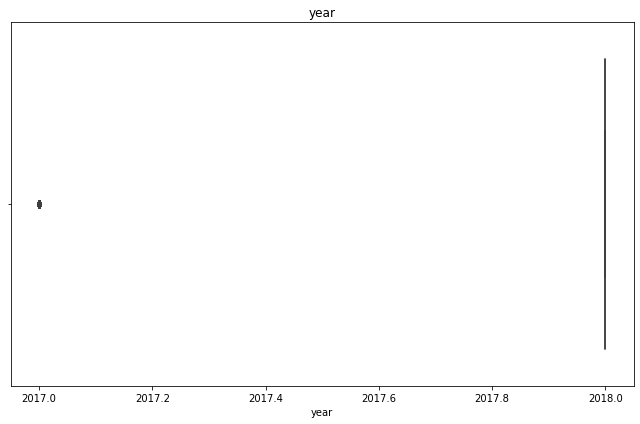

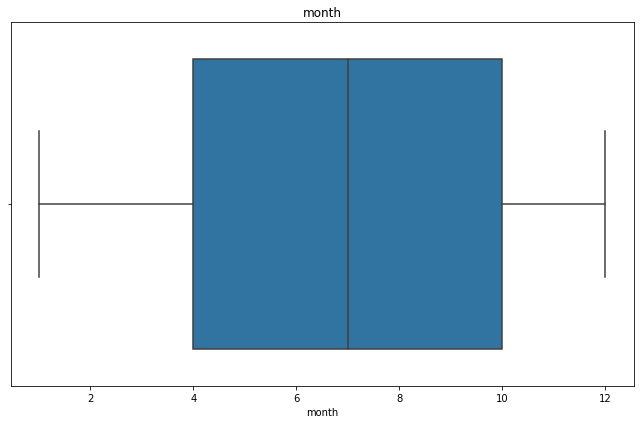

In [41]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  
plt.show()

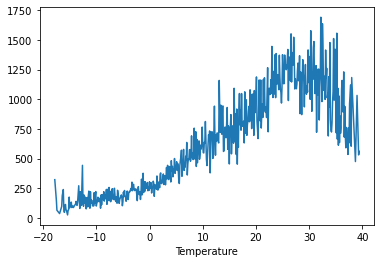

In [42]:
dataset.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

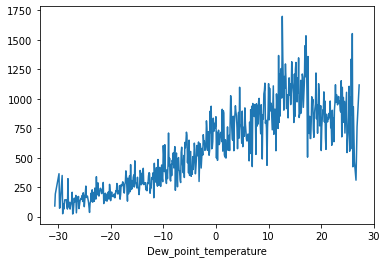

In [43]:
dataset.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

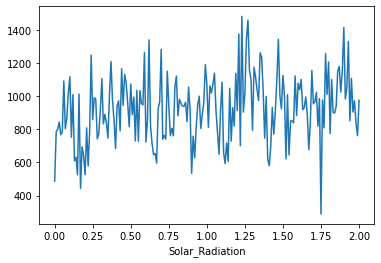

In [44]:
dataset.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

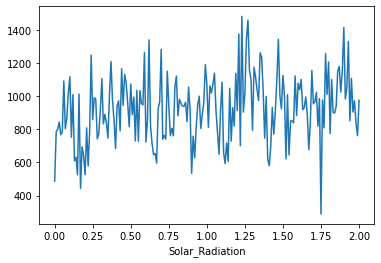

In [45]:
dataset.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

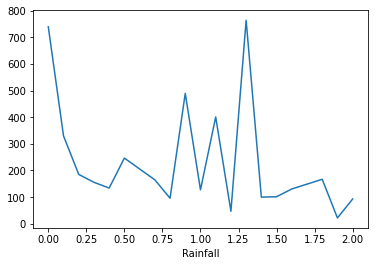

In [46]:
dataset.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

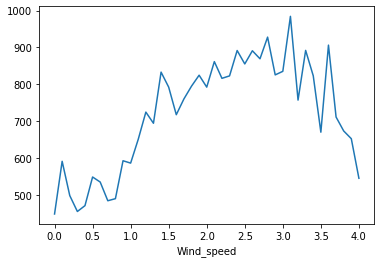

In [47]:
dataset.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**Distribution plot of rented_bike _count**

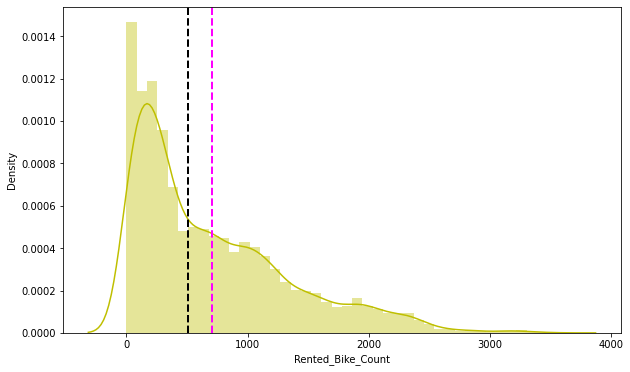

In [48]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(dataset['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(dataset['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

**Observation**
* In distribution graph we can see that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that ‘the distribution of dependent variable has to be normal’, so we should perform some operation to make it normal.

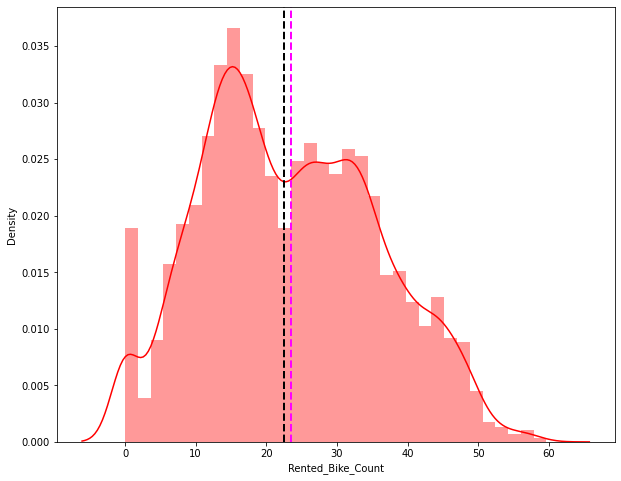

In [49]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Rented_Bike_Count']), color="red")
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

**obsrevation :** 
* Since generic rule for the skewed variable is Square root in order to make it normal, Now we have get here almost normal distribution.

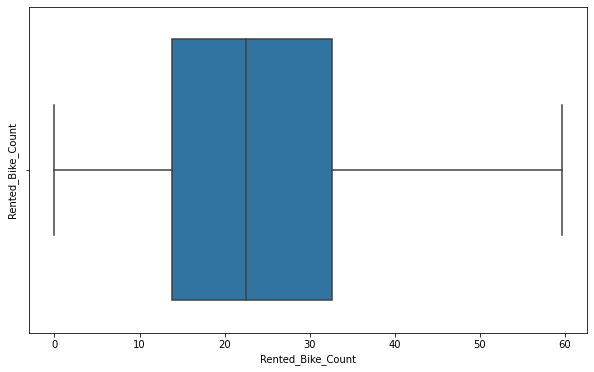

In [50]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']))
plt.show()

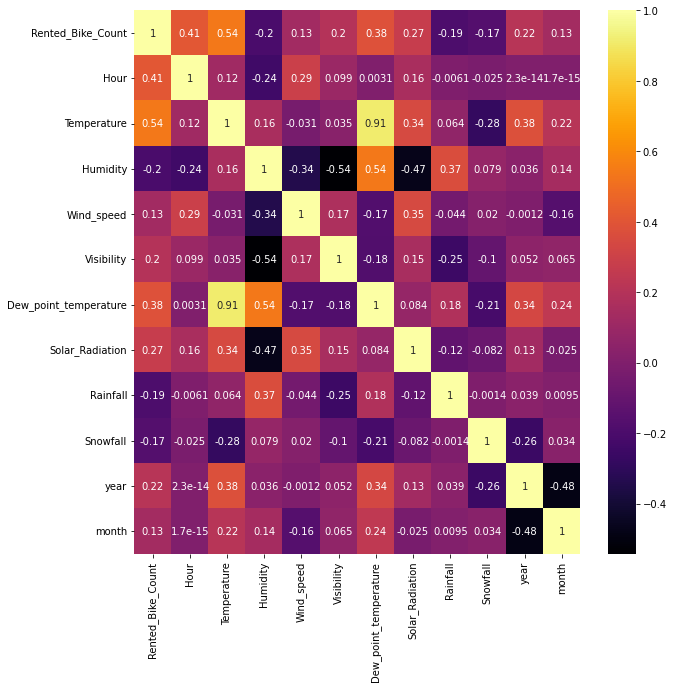

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

**Observation**

* There is high correlation between Temperature and Dew_point_temperature

In [52]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

In [53]:
dataset =dataset.drop(['Snowfall'],axis=1)
dataset=dataset.drop(['Visibility'],axis=1)

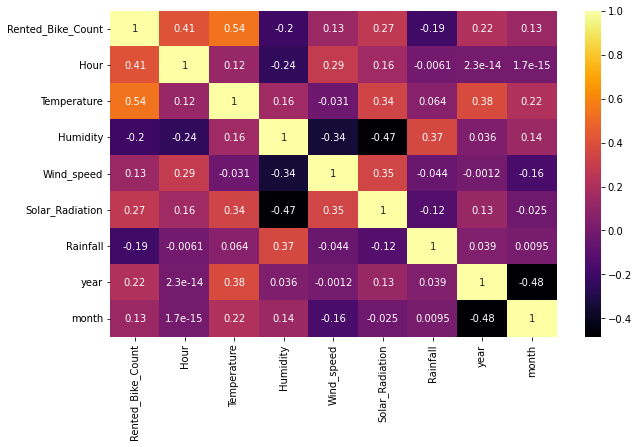

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [55]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = dataset['Rented_Bike_Count']
dataset.head(10)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
5,2017-12-01,100,5,-6.4,37,1.5,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
6,2017-12-01,181,6,-6.6,35,1.3,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
7,2017-12-01,460,7,-7.4,38,0.9,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
8,2017-12-01,930,8,-7.6,37,1.1,0.01,0.0,Winter,No Holiday,Yes,2017,12,Friday
9,2017-12-01,490,9,-6.5,27,0.5,0.23,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [54]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
0,1.0,-5.2,37,2.2,0.0,0.0
1,1.0,-5.5,38,0.8,0.0,0.0
2,1.0,-6.0,39,1.0,0.0,0.0
3,1.0,-6.2,40,0.9,0.0,0.0
4,1.0,-6.0,36,2.3,0.0,0.0
...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,0.0,0.0
8756,1.0,3.4,37,2.3,0.0,0.0
8757,1.0,2.6,39,0.3,0.0,0.0
8758,1.0,2.1,41,1.0,0.0,0.0


**Creating Train and Test Dataset**

In [56]:
numeric_features= dataset.select_dtypes(exclude='object')
categorical_features= dataset.select_dtypes(include='object')
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [57]:
numeric_features

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,year,month
0,2017-12-01,254,0,-5.2,37,2.2,0.0,0.0,2017,12
1,2017-12-01,204,1,-5.5,38,0.8,0.0,0.0,2017,12
2,2017-12-01,173,2,-6.0,39,1.0,0.0,0.0,2017,12
3,2017-12-01,107,3,-6.2,40,0.9,0.0,0.0,2017,12
4,2017-12-01,78,4,-6.0,36,2.3,0.0,0.0,2017,12
...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,0.0,0.0,2018,11
8756,2018-11-30,764,20,3.4,37,2.3,0.0,0.0,2018,11
8757,2018-11-30,694,21,2.6,39,0.3,0.0,0.0,2018,11
8758,2018-11-30,712,22,2.1,41,1.0,0.0,0.0,2018,11


In [58]:
categorical_features

,Seasons,Holiday,Functioning_Day,day
0,Winter,No Holiday,Yes,Friday
1,Winter,No Holiday,Yes,Friday
2,Winter,No Holiday,Yes,Friday
3,Winter,No Holiday,Yes,Friday
4,Winter,No Holiday,Yes,Friday
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday
8756,Autumn,No Holiday,Yes,Friday
8757,Autumn,No Holiday,Yes,Friday
8758,Autumn,No Holiday,Yes,Friday


In [59]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented_Bike_Count   R-squared (uncentered):                   0.701
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              4112.
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        19:54:19   Log-Likelihood:                         -67247.
No. Observations:                8760   AIC:                                  1.345e+05
Df Residuals:                    8755   BIC:                                  1.345e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature        33.3716      0.541     61.661      0.000      32.311      34.432
Humidity            0.1705      0.181      0.944      0.345      -0.184       0.525
Wind_speed        155.0329      5.311     29.192      0.000     144.622     165.443
Solar_Radiation    -7.8738      9.611     -0.819      0.413     -26.713      10.966
Rainfall         -421.8445     17.755    -23.759      0.000    -456.649    -387.040
==============================================================================
Omnibus:                      747.145   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1099.951
Skew:                           0.676   Prob(JB):                    1.41e-239
Kurtosis:                       4.089   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X.corr()

,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
Temperature,1.000000,0.159371,-0.031368,0.344077,0.064129
Humidity,0.159371,1.000000,-0.341432,-0.472300,0.365359
Wind_speed,-0.031368,-0.341432,1.000000,0.348096,-0.043856
Solar_Radiation,0.344077,-0.472300,0.348096,1.000000,-0.120866
Rainfall,0.064129,0.365359,-0.043856,-0.120866,1.000000


In [62]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)


In [63]:
dataset=pd.get_dummies(dataset, columns=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'], prefix=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'])

In [64]:
dataset=dataset.drop(['year'],axis=1)

In [65]:
dataset=dataset.drop(['Date'],axis=1)

In [66]:
dataset

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,day,Hour_0,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [68]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,9.976222
1,Humidity,2.062380
2,Wind_speed,1.439860
3,Solar_Radiation,5.391084
4,Rainfall,1.248416
5,day,1.008243
6,Hour_0,inf
7,Hour_1,inf
8,Hour_2,inf
9,Hour_3,inf


In [69]:
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [71]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [72]:
reg.score(X_train, y_train)

0.8014566326491939

In [73]:
reg.coef_

array([ 4.26190397e-01, -1.04198564e-01, -2.41156301e-02,  1.26767858e+00,
       -9.04094587e+00,  1.42894834e+00,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10, -4.43890414e+10,  1.36003120e+11,
        2.24311335e+11,  2.79880851e+11,  8.12111630e+09,  8.12111631e+09,
        1.39459384e+10,  1.39459384e+10, -8.27892047e+10, -8.27892047e+10,
        6.10885263e+10,  6.10885263e+10,  6.10885263e+10, -2.72196896e+10,
       -2.72196896e+10, -2.72196896e+10,  2.41480687e+11,  2.41480687e+11,
        2.41480687e+11, -8.27892047e+10])

In [74]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [75]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827815064321978
RMSE : 5.5522801680320475
MAE : 4.244091637037914
R2 : 0.8014566326491939
Adjusted R2 : 0.7956205548317099


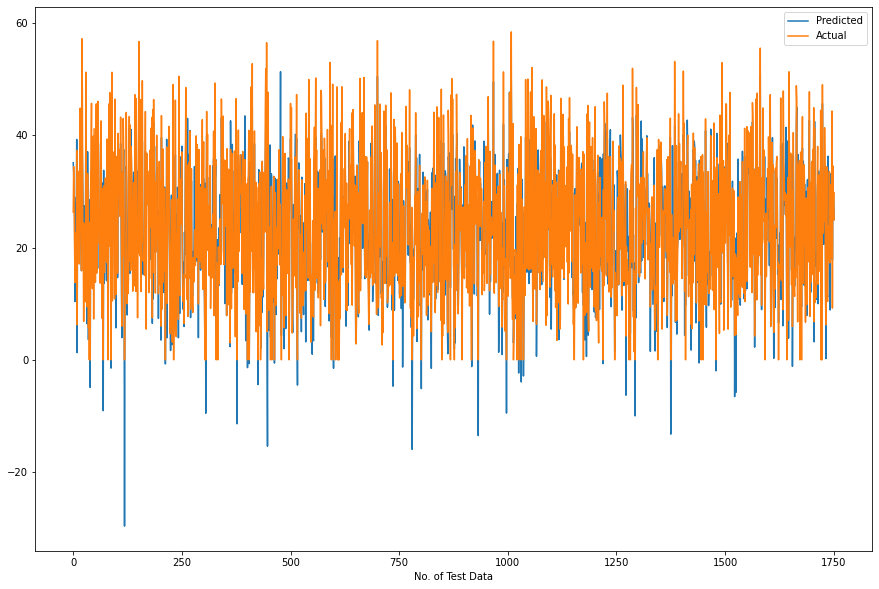

In [76]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

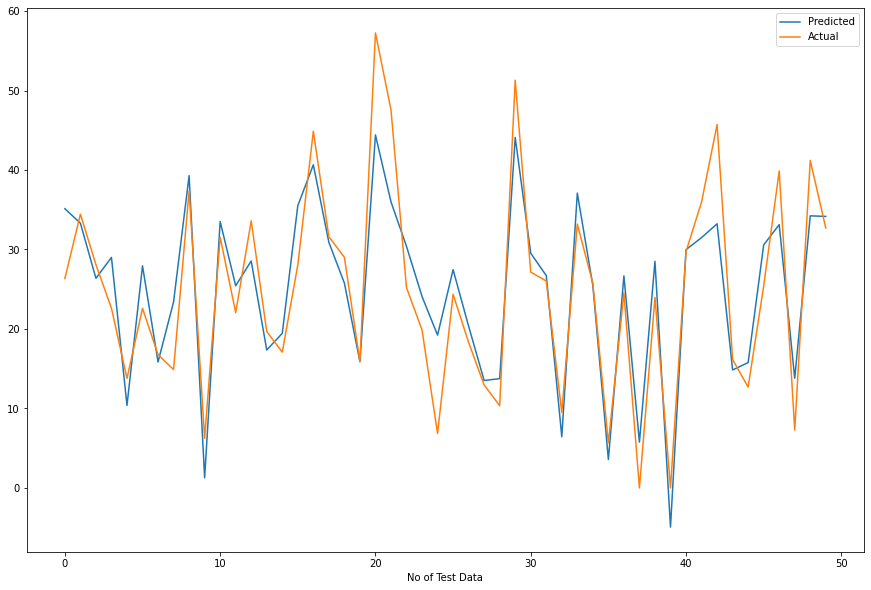

In [77]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Lasso Regression**

In [78]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3847772219016671 0.3933621461999468


In [79]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 94.1926180536763
RMSE : 9.70528814892563
MAE : 7.373290166857704
R2 : 0.3933621461999468
Adjusted R2 : 0.3755303456767236


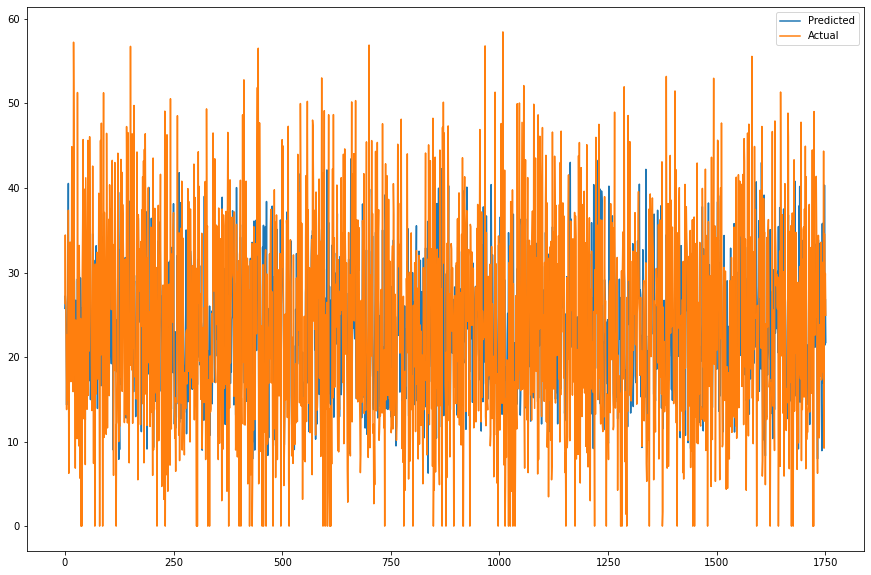

In [81]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

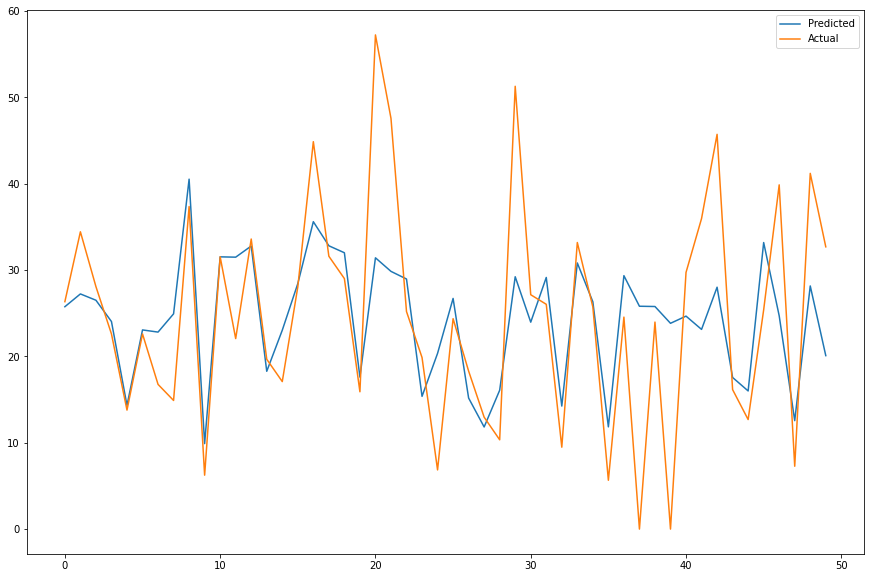

In [82]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso[0:50]))
plt.plot(np.array((y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

# **Ridge Regression**

In [83]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [84]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [85]:
#check the score
ridge.score(X_train, y_train)

0.8014566179842934

In [86]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [87]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827817341340076
RMSE : 5.552280373084565
MAE : 4.244176156876699
R2 : 0.8014566179842934
Adjusted R2 : 0.7956205397357423


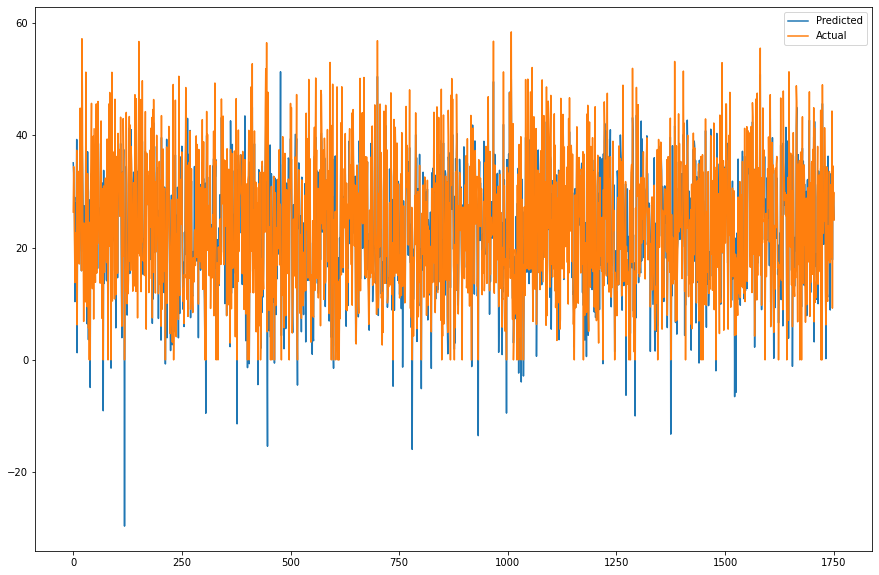

In [88]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

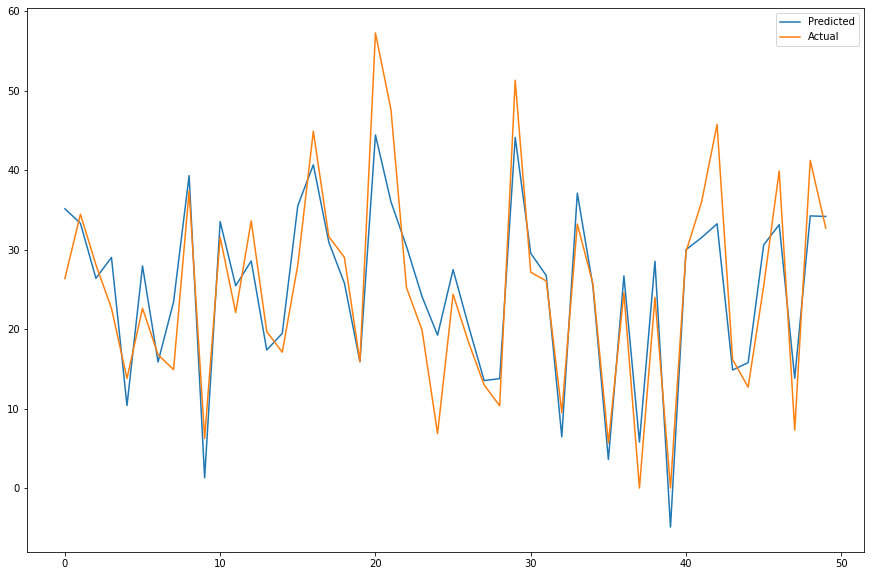

In [89]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()